---
title: "Exploratory Data Analysis"
bread-crumbs: true
sidebar: false
author: "crg123"
date: "2025-04-07"
toc: true
format:
  html:
    embed-resources: true
bibliography: "references.bib"
warnings: false
---

Exploratory Data Analysis (EDA) serves as a foundational phase in the analytic process, aimed at uncovering key patterns, distributions, and relationships within the security incident data. This step is not focused on producing polished visualizations, but rather on conducting a structured investigation of the dataset to guide future design and analytical decisions. The visual outputs generated during EDA are intended to support internal understanding and inform the development of the final interactive dashboard.

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Tahoma"
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

df = pd.read_csv("data/clean_data/cleaned_security_incidents.csv", parse_dates=["date"])
df.head(3)

,incident_id,date,country_code,country,region,district,city,UN,INGO,ICRC,...,attack_context,location,latitude,longitude,motive,actor_type,actor_name,details,verified,source
0,5,1997-02-14,RW,Rwanda,Kigali,Kigali,Kigali,1,0,0,...,Individual attack,Unknown,-1.950851,30.061508,Political,Unknown,Unknown,1 UN national staff shot and killed in Kigali ...,Archived,Archived
1,6,1997-05-07,SL,Sierra Leone,Tonkolili District,Unknown,Mayamba,3,0,0,...,Ambush,Road,8.640035,-11.840027,Unknown,Unknown,Unknown,1 UN national staff driver killed and 2 UN nat...,Archived,Archived
2,12,1997-06-08,RW,Rwanda,Northern,Musanze,Ruhengeri,0,1,0,...,Combat/Crossfire,Unknown,-1.499840,29.634970,Incidental,Unknown,Unknown,1 INGO national staff killed when he was among...,Archived,Archived


## Geospatial Data Analysis

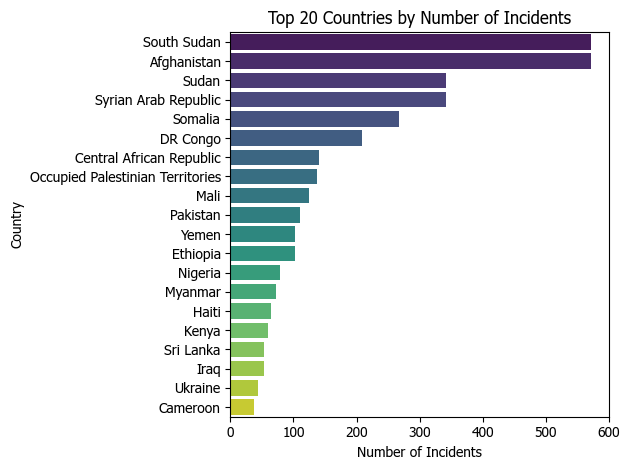

In [61]:
# Top 10 Countries by Number of Incidents
top_countries = df["country"].value_counts().head(20)
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.title("Top 20 Countries by Number of Incidents")
plt.xlabel("Number of Incidents")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

### World Map Visualization

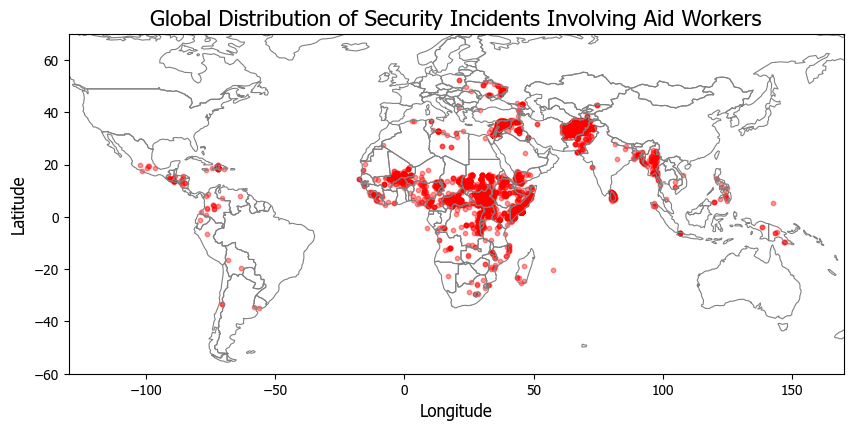

In [62]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

df = pd.read_csv("data/clean_data/cleaned_security_incidents.csv", parse_dates=["date"])
df_geo = df.dropna(subset=["latitude", "longitude"])

gdf = gpd.GeoDataFrame(
    df_geo,
    geometry=gpd.points_from_xy(df_geo["longitude"], df_geo["latitude"]),
    crs="EPSG:4326",
)

world = gpd.read_file(
    "data/maps/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp"
)
world = world[~world["ADMIN"].isin(["Antarctica", "Oceania"])]

fig, ax = plt.subplots(figsize=(10, 10))
world.boundary.plot(ax=ax, linewidth=0.8, color="gray")
gdf.plot(ax=ax, markersize=10, alpha=0.4, color="red")
plt.title(
    "Global Distribution of Security Incidents Involving Aid Workers", fontsize=16
)
plt.axis("on")
ax.set_xlim(-130, 170)  # Adjusting x-limits to focus on the relevant regions
ax.set_ylim(-60, 70)  # Adjusting y-limits to focus on the relevant regions
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.show()

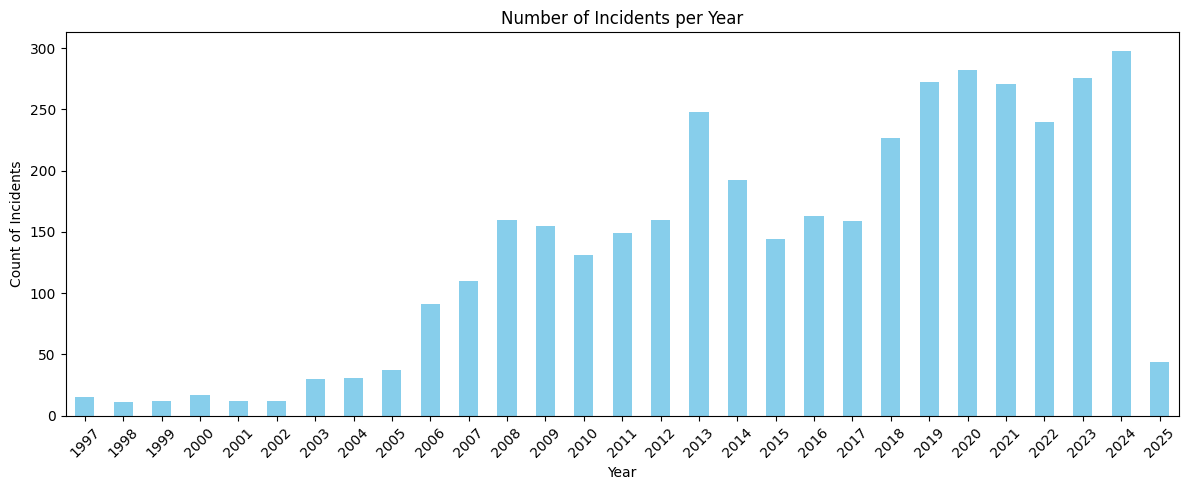

In [ ]:
# ---------------------
# Total Incidents Over Time
# ---------------------
plt.figure(figsize=(12, 5))
df["date"].dt.year.value_counts().sort_index().plot(kind="bar", color="skyblue")
plt.title("Number of Incidents per Year")
plt.xlabel("Year")
plt.ylabel("Count of Incidents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

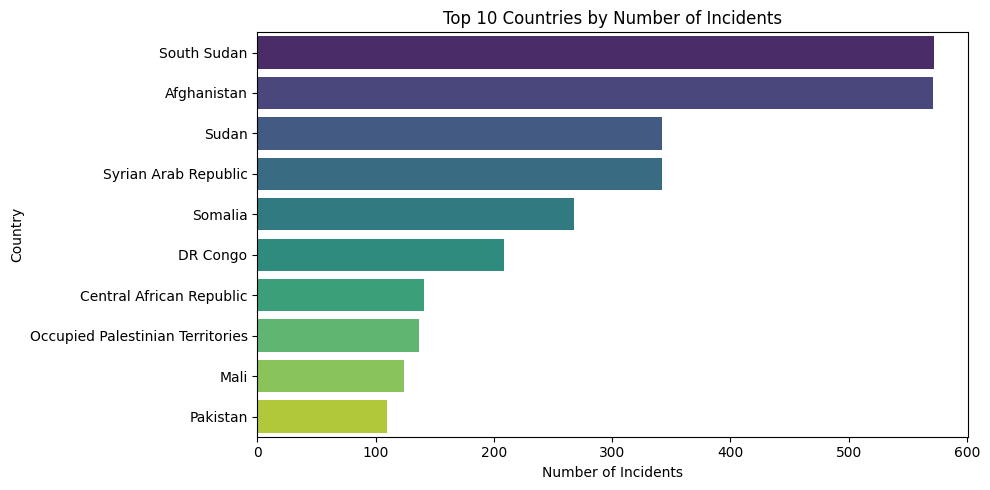

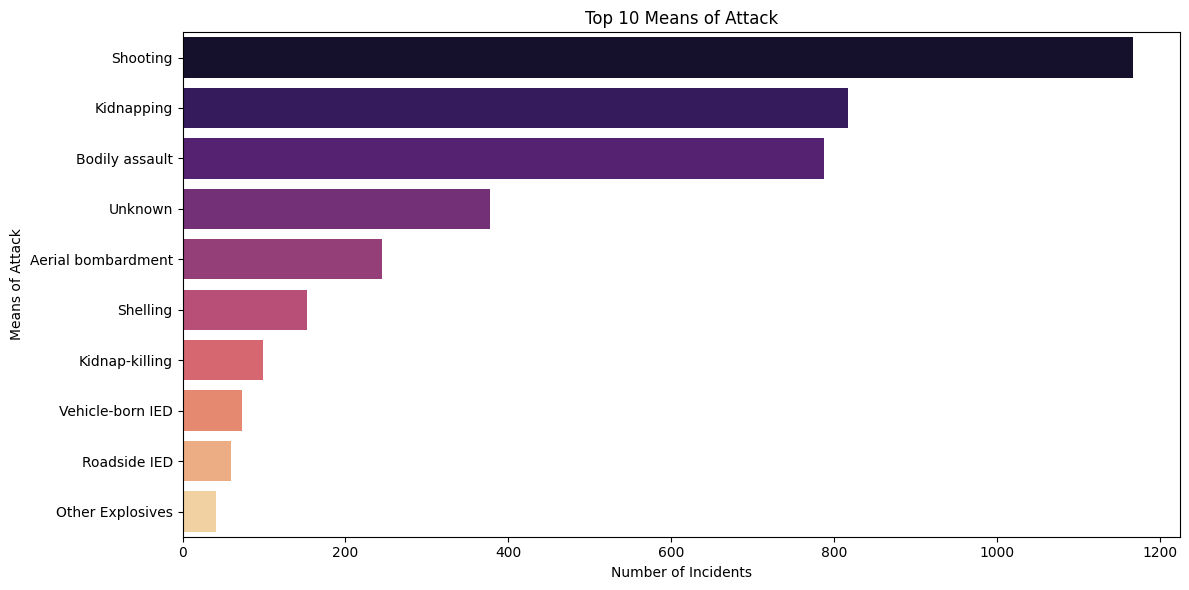

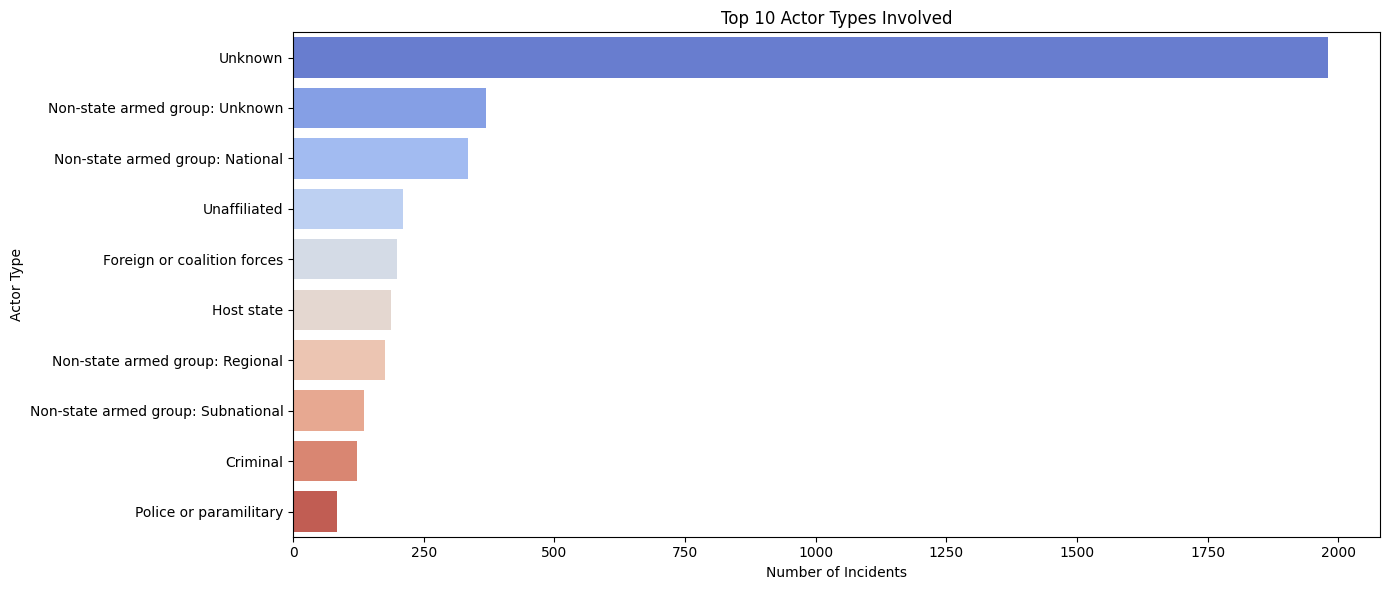

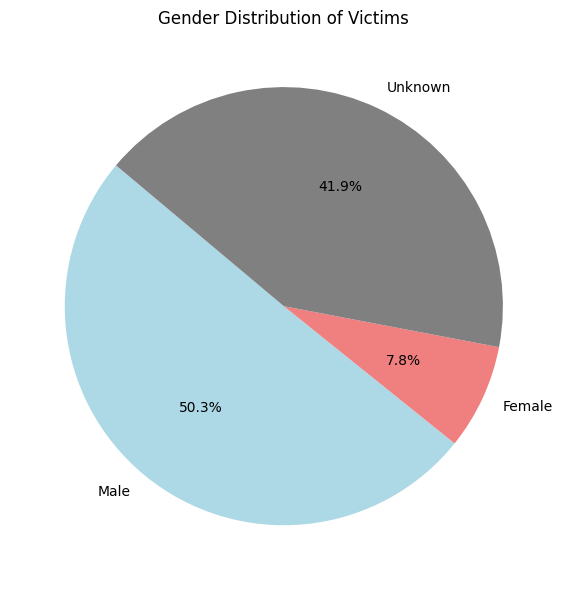

In [ ]:
# ---------------------
# Distribution of Means of Attack
# ---------------------
plt.figure(figsize=(12, 6))
top_attacks = df["means_of_attack"].value_counts().head(10)
sns.barplot(x=top_attacks.values, y=top_attacks.index, palette="magma")
plt.title("Top 10 Means of Attack")
plt.xlabel("Number of Incidents")
plt.ylabel("Means of Attack")
plt.tight_layout()
plt.show()

# ---------------------
# Actor Type vs. Attack Count
# ---------------------
plt.figure(figsize=(14, 6))
actor_counts = df["actor_type"].value_counts().head(10)
sns.barplot(x=actor_counts.values, y=actor_counts.index, palette="coolwarm")
plt.title("Top 10 Actor Types Involved")
plt.xlabel("Number of Incidents")
plt.ylabel("Actor Type")
plt.tight_layout()
plt.show()

# ---------------------
# Gender Distribution of Victims
# ---------------------
plt.figure(figsize=(6, 6))
gender_totals = df[["gender_male", "gender_female", "gender_unknown"]].sum()
gender_totals.plot(
    kind="pie",
    autopct="%1.1f%%",
    startangle=140,
    labels=["Male", "Female", "Unknown"],
    colors=["lightblue", "lightcoral", "grey"],
)
plt.title("Gender Distribution of Victims")
plt.ylabel("")
plt.tight_layout()
plt.show()